# Dependencies

In [125]:
import pandas as pd

# Descriptive analysis

In [126]:
import pandas as pd

clean_TEB_encontrados = pd.read_csv('clean_teestamosbuscando_2019_11_17_found_people_profiles.csv')
clean_TEB_desaparecidos = pd.read_csv('clean_teestamosbuscando_2019_11_17_people_profiles.csv')

In [127]:
clean_TEB_encontrados.describe()

,age,height,n_tokens_circumstances
count,1826.000000,1849.000000,674.000000
mean,13.853779,151.204705,8.081602
std,2.920495,16.318997,6.029215
min,0.000000,40.000000,0.000000
25%,13.000000,150.000000,4.000000
50%,14.000000,155.000000,6.000000
75%,16.000000,160.000000,11.000000
max,38.000000,186.000000,44.000000


In [128]:
clean_TEB_desaparecidos.describe()

,age,height,n_tokens_circumstances
count,3207.000000,3237.000000,1720.000000
mean,14.067664,151.538956,6.494767
std,2.722238,15.710185,5.371913
min,0.000000,32.000000,1.000000
25%,13.000000,150.000000,3.000000
50%,15.000000,155.000000,5.000000
75%,16.000000,160.000000,8.000000
max,18.000000,187.000000,61.000000


In [129]:
%matplotlib inline

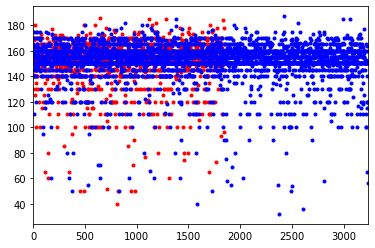

In [130]:
clean_TEB_encontrados['height'].plot(style='r.')
clean_TEB_desaparecidos['height'].plot(style='b.')

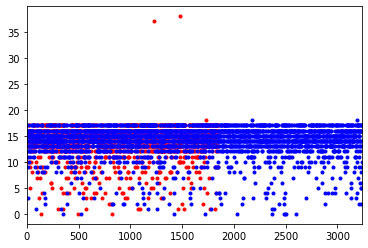

In [131]:
clean_TEB_encontrados['age'].plot(style='r.')
clean_TEB_desaparecidos['age'].plot(style='b.')

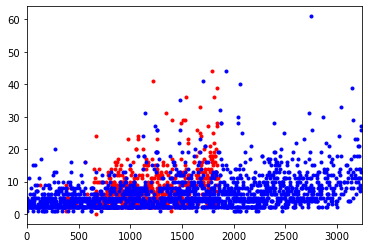

In [132]:
clean_TEB_encontrados['n_tokens_circumstances'].plot(style='r.')
clean_TEB_desaparecidos['n_tokens_circumstances'].plot(style='b.')

site_uid
teestamosbuscando_desaparecidos    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
teestamosbuscando_encontrados      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

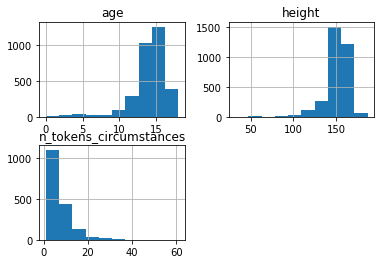

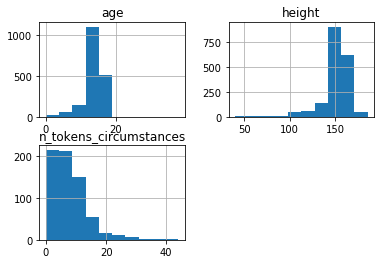

In [133]:
all_TEB = pd.concat([clean_TEB_encontrados, clean_TEB_desaparecidos])
grouped = all_TEB.groupby('site_uid')
grouped.hist()

In [135]:
grouped['height'].agg(['min', 'mean', 'max'])

,min,mean,max
site_uid,,,
teestamosbuscando_desaparecidos,32.0,151.538956,187.0
teestamosbuscando_encontrados,40.0,151.204705,186.0


In [136]:
grouped['age'].agg(['min', 'mean', 'max'])

,min,mean,max
site_uid,,,
teestamosbuscando_desaparecidos,0.0,14.067664,18.0
teestamosbuscando_encontrados,0.0,13.853779,38.0


In [137]:
grouped['n_tokens_circumstances'].agg(['min', 'mean', 'max'])

,min,mean,max
site_uid,,,
teestamosbuscando_desaparecidos,1.0,6.494767,61.0
teestamosbuscando_encontrados,0.0,8.081602,44.0


site_uid
teestamosbuscando_desaparecidos    AxesSubplot(0.125,0.125;0.775x0.755)
teestamosbuscando_encontrados      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

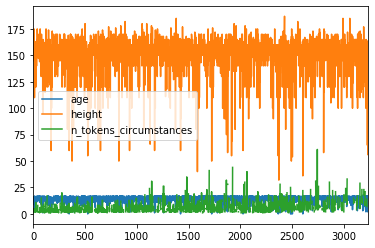

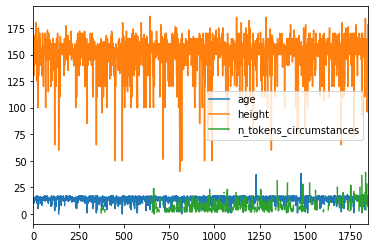

In [138]:
grouped.plot()